In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sns
%matplotlib inline
from scipy.stats import zscore,spearmanr
from sklearn.cluster import KMeans

In [3]:
# Reading the Dataframe
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Sampan_Naik/dataFishNewIn.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL,Current Sp,Tide,Wind spe,Temperature,label
0,840,88.251681,861.328125,352.193885,26.869224,290.551995,0.107793,0.891084,0.147917,121.741351,120.049537,115.572434,7.530,1.64,0.607333,29.266,scia
1,855,94.311016,732.128906,349.741479,27.316954,288.400600,0.361470,0.897462,0.142868,125.267049,124.462998,116.182654,8.471,1.54,0.462667,29.222,scia
2,870,93.597116,861.328125,351.349077,27.216269,289.446729,0.271624,0.894944,0.145730,125.249877,124.397613,116.397882,8.502,1.43,0.637333,29.256,scia
3,885,94.147293,861.328125,351.027752,26.660596,290.034240,0.187662,0.894372,0.154119,125.212633,124.511974,115.631092,10.639,1.32,0.778000,29.263,scia
4,900,93.720958,861.328125,355.876209,26.729999,293.423045,0.248323,0.894582,0.146458,125.403830,124.630878,116.046655,11.503,1.20,1.071333,29.280,scia


In [4]:
X=df.drop(['Db','Current Sp','Tide','Wind spe','Temperature','label'],axis=1)
y = df[['label']]

In [5]:
print('Shape of X values:',X.shape)
print('Shape of label y values:',y.shape)

Shape of X values: (351, 11)
Shape of label y values: (351, 1)


In [6]:
y.value_counts()

,count
label,
inv1,98
scia,79
tera,65
inv2,35
shrimp,27
typeA,26
plankt,21


#### Spearman

In [7]:
spear,pval=spearmanr(X)

In [8]:
pval

array([[0.00000000e+000, 5.09530495e-021, 2.58981263e-042,
        3.76238752e-028, 1.03410264e-042, 3.66028646e-051,
        3.72282808e-003, 9.42157120e-004, 3.14906599e-072,
        8.17892270e-068, 2.80772341e-053],
       [5.09530495e-021, 0.00000000e+000, 3.43931735e-016,
        6.04579649e-020, 4.79689261e-015, 5.24520094e-033,
        4.53585842e-005, 9.97075317e-005, 3.84925524e-040,
        6.62625724e-046, 2.40599179e-013],
       [2.58981263e-042, 3.43931735e-016, 0.00000000e+000,
        3.29439749e-059, 2.02351502e-318, 2.04071686e-038,
        1.80209450e-001, 3.26363850e-002, 1.49899814e-059,
        6.78415813e-066, 1.08739722e-039],
       [3.76238752e-028, 6.04579649e-020, 3.29439749e-059,
        0.00000000e+000, 7.56413420e-047, 2.10785468e-033,
        1.53266954e-001, 6.98997240e-001, 2.86906601e-069,
        3.78153363e-072, 1.10831047e-035],
       [1.03410264e-042, 4.79689261e-015, 2.02351502e-318,
        7.56413420e-047, 0.00000000e+000, 2.85462247e-038,
  

In [9]:
col = ['Time','Peak frequency','Wide_ACI','Fish_ACI','Shrimp_ACI','Wide_AEI','Fish_AEI','Shrimp_AEI','Wide band_SPL','Fish band_SPL','shrimp band_SPL']
heat_spear=pd.DataFrame(spear,index=col,columns=col)
heat_spear

,Time,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL
Time,1.000000,-0.473550,-0.642858,-0.541655,-0.645239,0.691172,0.154451,0.175779,0.777304,0.761911,0.701464
Peak frequency,-0.473550,1.000000,0.416885,0.461828,0.401738,-0.580505,-0.215883,0.206202,-0.629506,-0.663572,-0.377701
Wide_ACI,-0.642858,0.416885,1.000000,0.728140,0.992275,-0.618422,-0.071693,-0.114074,-0.729587,-0.754834,-0.626650
Fish_ACI,-0.541655,0.461828,0.728140,1.000000,0.668745,-0.583457,-0.076387,-0.020711,-0.767117,-0.777037,-0.599885
Shrimp_ACI,-0.645239,0.401738,0.992275,0.668745,1.000000,-0.617464,-0.068749,-0.148177,-0.713840,-0.738340,-0.634904
Wide_AEI,0.691172,-0.580505,-0.618422,-0.583457,-0.617464,1.000000,0.459093,0.305162,0.812987,0.826502,0.649593
Fish_AEI,0.154451,-0.215883,-0.071693,-0.076387,-0.068749,0.459093,1.000000,0.179967,0.261614,0.293994,0.009617
Shrimp_AEI,0.175779,0.206202,-0.114074,-0.020711,-0.148177,0.305162,0.179967,1.000000,0.185205,0.158365,0.373306
Wide band_SPL,0.777304,-0.629506,-0.729587,-0.767117,-0.713840,0.812987,0.261614,0.185205,1.000000,0.986355,0.857594
Fish band_SPL,0.761911,-0.663572,-0.754834,-0.777037,-0.738340,0.826502,0.293994,0.158365,0.986355,1.000000,0.804428


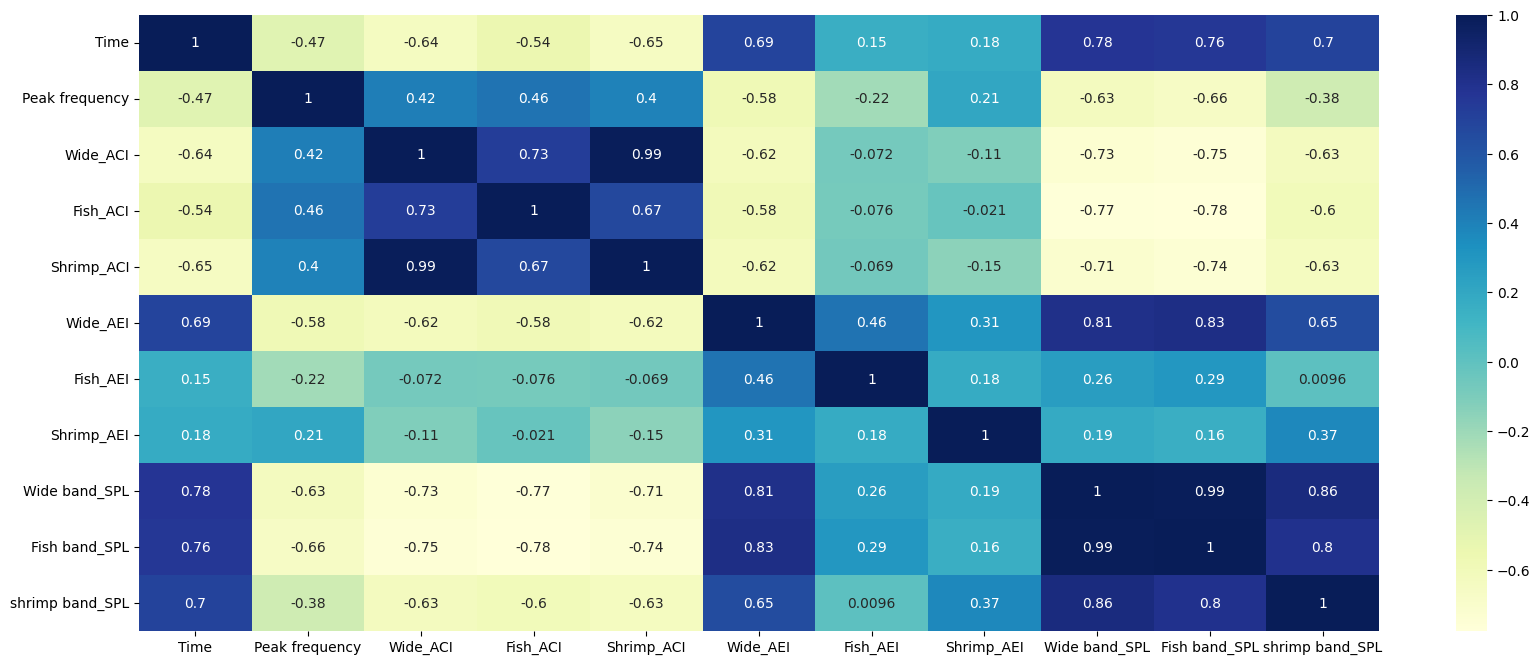

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(heat_spear,cmap="YlGnBu", annot=True)
plt.savefig('/content/drive/MyDrive/Sampan_Naik/heatmap1.png')
plt.show()

In [11]:
# Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(spear)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 3.21131437e-01  2.24100058e-02  4.53997288e-02 -2.16126189e-01
  -5.62155599e-01  5.13318141e-01 -4.49496228e-01 -2.48108516e-01
  -6.27949596e-02 -2.31241662e-02  1.91514840e-03]
 [-2.47874926e-01  2.39331002e-01  4.88435238e-01  3.18762654e-01
   1.36942189e-01  6.26277187e-01  8.60033899e-02  2.96513430e-01
   1.85867007e-01 -1.56953756e-02 -3.75723041e-03]
 [-3.33335836e-01  1.80631411e-01 -2.06676786e-01 -4.82022141e-01
   1.60228355e-01  1.45271347e-01 -7.60581755e-02  4.22315683e-02
   2.72960592e-02 -1.32967392e-01 -7.13041536e-01]
 [-3.12139993e-01  2.17950604e-01 -4.70638283e-02 -1.45763357e-01
  -7.07965551e-01 -1.38431421e-01  4.75041378e-01  1.26505726e-01
   2.47340835e-01  2.84872488e-02  8.69982585e-02]
 [-3.28943265e-01  1.50098693e-01 -2.28332992e-01 -4.72431776e-01
   2.62274369e-01  1.84475618e-01 -1.55589699e-01  1.80794174e-02
   2.68571416e-02  7.73035289e-02  6.78150214e-01]
 [ 3.34698477e-01  2.44333694e-01 -1.93595264e-01 -2.57721381e-02
 

In [12]:
tot = 0
for i in eig_vals:
  tot = tot + i
print(tot)
# eig_vals
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("Variance",var_exp)

11.000000000000002
Cumulative Variance Explained [ 59.55092709  71.36759388  82.22894812  88.34858297  92.27523582
  95.57095067  97.68508749  99.25226938  99.90070163  99.9693336
 100.        ]
Variance [59.550927086733786, 11.816666794931377, 10.861354242034462, 6.119634846007924, 3.9266528473867606, 3.2957148572416632, 2.1141368109542116, 1.5671818969497626, 0.6484322428800259, 0.06863197086215438, 0.030666404017884875]


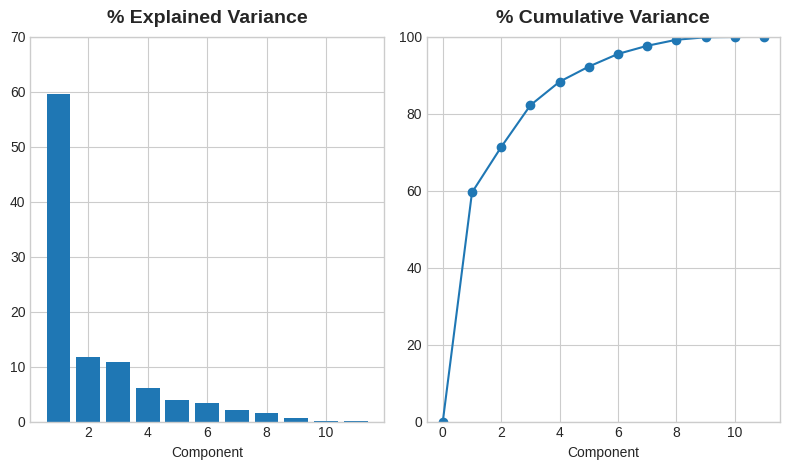

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

width=8
dpi=100
 # Create figure
fig, axs = plt.subplots(1, 2)
n = 11
grid = np.arange(1, n + 1)
    # Explained variance
evr = var_exp
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 70.0))
    # Cumulative Variance
cv = cum_var_exp
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 100.0))
    # Set up figure
fig.set(figwidth=8, dpi=100)
plt.show()

In [14]:
# Taking only 6 Principal components
sVT = eig_vecs[:,:6].T
sXT=X.T.values
sZ=np.dot(sVT,sXT)

In [15]:
component_names = [f"PC{i+1}" for i in range(6)]
S_pca_df = pd.DataFrame(sZ.T.tolist(), columns=component_names)
S_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-36.326080,351.307585,333.048626,-299.014648,-192.077976,1107.803225
1,5.178673,320.229415,271.117848,-342.699231,-218.219095,1034.498783
2,-22.869600,351.910761,334.426146,-306.084516,-208.340043,1123.583566
3,-18.212288,352.069624,334.859285,-309.071828,-216.333192,1131.334352
4,-15.876545,353.856373,333.842810,-316.474790,-223.065370,1140.432009


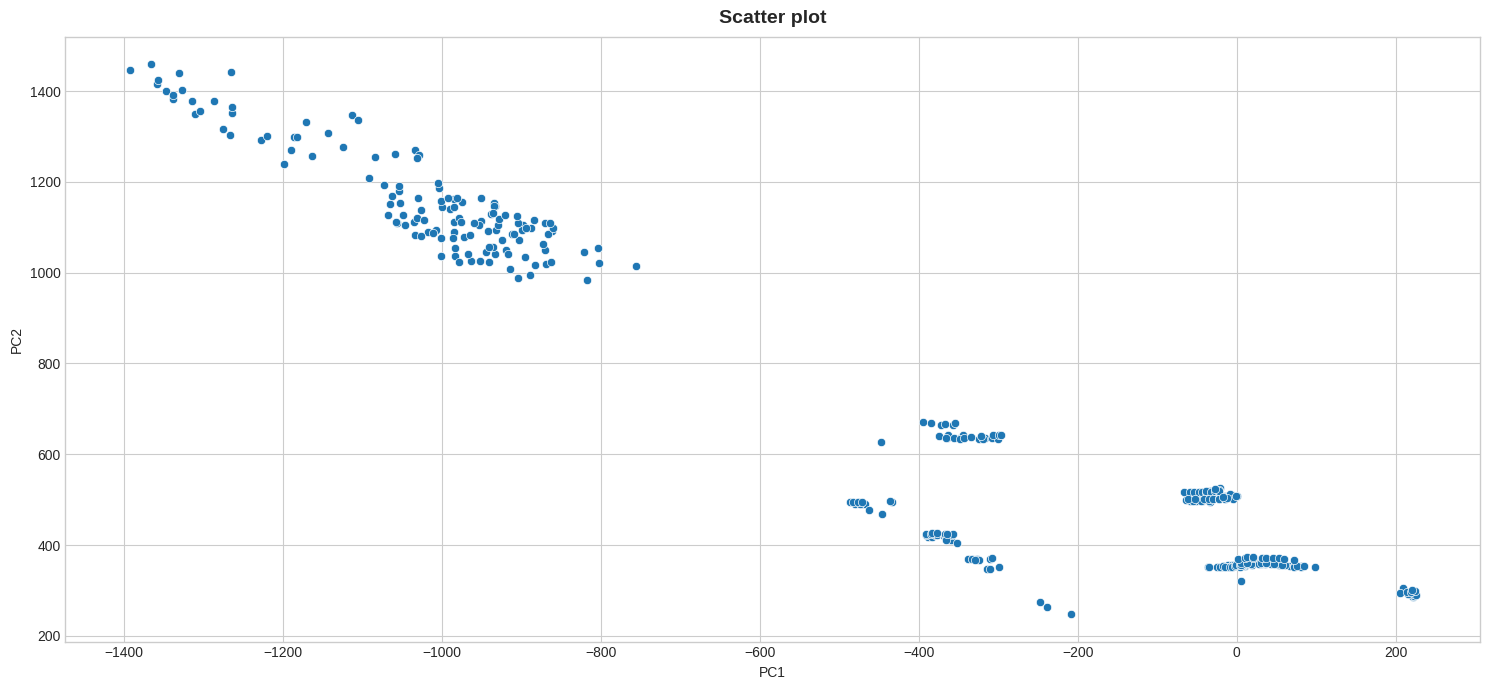

In [16]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(x=S_pca_df['PC1'],y=S_pca_df['PC2'])
plt.show()

In [17]:
df_z = zscore(S_pca_df)

In [18]:
distortions = []
labels = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_z)
    distortions.append(kmeanModel.inertia_)
l = kmeanModel.labels_

In [19]:
df_z['labels'] = l

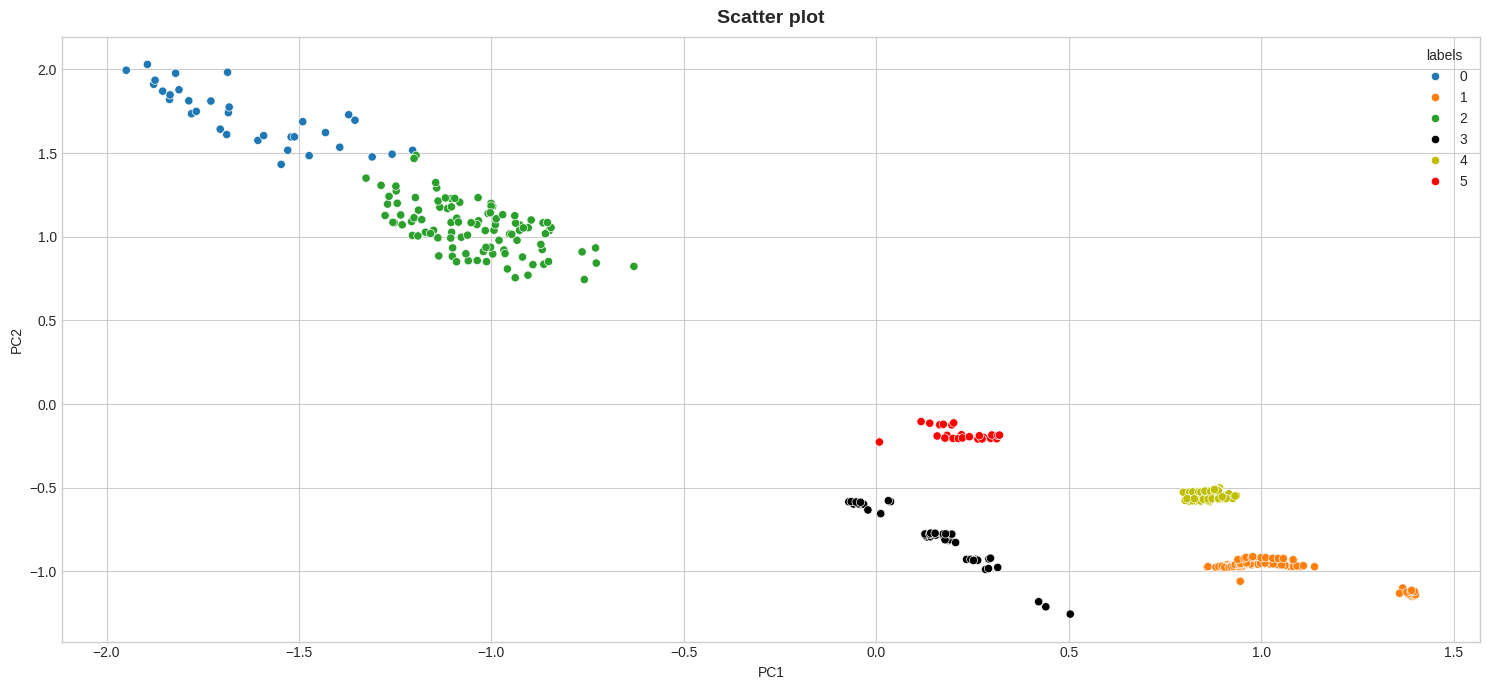

In [20]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(x=df_z['PC1'],y=df_z['PC2'],hue = df_z['labels'],palette=["C0", "C1", "C2", 'k','y','r'])
# plt.save
plt.show()

#### 191 dataset

In [90]:
df.head()

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL,Current Sp,Tide,Wind spe,Temperature,label
0,840,88.251681,861.328125,352.193885,26.869224,290.551995,0.107793,0.891084,0.147917,121.741351,120.049537,115.572434,7.530,1.64,0.607333,29.266,scia
1,855,94.311016,732.128906,349.741479,27.316954,288.400600,0.361470,0.897462,0.142868,125.267049,124.462998,116.182654,8.471,1.54,0.462667,29.222,scia
2,870,93.597116,861.328125,351.349077,27.216269,289.446729,0.271624,0.894944,0.145730,125.249877,124.397613,116.397882,8.502,1.43,0.637333,29.256,scia
3,885,94.147293,861.328125,351.027752,26.660596,290.034240,0.187662,0.894372,0.154119,125.212633,124.511974,115.631092,10.639,1.32,0.778000,29.263,scia
4,900,93.720958,861.328125,355.876209,26.729999,293.423045,0.248323,0.894582,0.146458,125.403830,124.630878,116.046655,11.503,1.20,1.071333,29.280,scia


In [91]:
X=df.drop(['Current Sp','Tide','Wind spe','Temperature'],axis=1)

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             351 non-null    int64  
 1   Db               351 non-null    float64
 2   Peak frequency   351 non-null    float64
 3   Wide_ACI         351 non-null    float64
 4   Fish_ACI         351 non-null    float64
 5   Shrimp_ACI       351 non-null    float64
 6   Wide_AEI         351 non-null    float64
 7   Fish_AEI         351 non-null    float64
 8   Shrimp_AEI       351 non-null    float64
 9   Wide band_SPL    351 non-null    float64
 10  Fish band_SPL    351 non-null    float64
 11  shrimp band_SPL  351 non-null    float64
 12  label            351 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 35.8+ KB


In [93]:
X=X[~(X['label']=='inv1')]

In [94]:
X=X[~(X['label']=='inv2')]

In [95]:
X=X[~(X['label']=='shrimp')]

In [27]:
X.shape

(191, 13)

In [96]:
X_ = X.drop(['label'],axis=1)
y = X[['label']]

In [97]:
y.value_counts()

,count
label,
scia,79
tera,65
typeA,26
plankt,21


#### Spearman

In [30]:
spear,pval=spearmanr(X_)

In [31]:
pval

array([[0.00000000e+000, 3.19107346e-041, 4.57870287e-001,
        1.99340105e-019, 1.52996384e-006, 1.32465146e-021,
        4.41202776e-036, 9.66533224e-003, 2.26304878e-011,
        6.91021014e-039, 1.35929191e-037, 7.92929596e-029],
       [3.19107346e-041, 0.00000000e+000, 1.30118782e-002,
        1.13550256e-036, 3.05656754e-022, 2.34831647e-038,
        4.70469137e-062, 2.07047186e-004, 6.60877122e-015,
        1.63839586e-157, 1.05238261e-171, 1.71606241e-045],
       [4.57870287e-001, 1.30118782e-002, 0.00000000e+000,
        1.22543451e-006, 4.79298338e-013, 7.41140243e-006,
        2.94940313e-003, 1.00420823e-001, 5.86934160e-015,
        3.55682186e-003, 7.53526585e-003, 3.31576292e-006],
       [1.99340105e-019, 1.13550256e-036, 1.22543451e-006,
        0.00000000e+000, 1.15472022e-033, 2.81033438e-178,
        6.47916726e-024, 7.26330154e-001, 6.73023510e-012,
        4.70383912e-043, 4.16771460e-041, 6.69363669e-045],
       [1.52996384e-006, 3.05656754e-022, 4.79298338

In [32]:
col = ['Time','Db','Peak frequency','Wide_ACI','Fish_ACI','Shrimp_ACI','Wide_AEI','Fish_AEI','Shrimp_AEI','Wide band_SPL','Fish band_SPL','shrimp band_SPL']
heat_spear=pd.DataFrame(spear,index=col,columns=col)
heat_spear

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL
Time,1.000000,0.785345,0.054031,-0.591710,-0.339674,-0.619205,0.752212,0.186806,0.459593,0.770975,0.762536,0.694480
Db,0.785345,1.000000,0.179413,-0.756300,-0.626764,-0.767553,0.876953,0.265377,0.524728,0.988640,0.991974,0.809026
Peak frequency,0.054031,0.179413,1.000000,-0.342607,-0.492166,-0.317906,0.214023,0.119228,0.525582,0.209945,0.192803,0.329212
Wide_ACI,-0.591710,-0.756300,-0.342607,1.000000,0.734567,0.993166,-0.645691,0.025489,-0.470216,-0.795891,-0.784657,-0.805931
Fish_ACI,-0.339674,-0.626764,-0.492166,0.734567,1.000000,0.689522,-0.475625,-0.126974,-0.308858,-0.673397,-0.670123,-0.560728
Shrimp_ACI,-0.619205,-0.767553,-0.317906,0.993166,0.689522,1.000000,-0.666160,0.033380,-0.502983,-0.804064,-0.791475,-0.832549
Wide_AEI,0.752212,0.876953,0.214023,-0.645691,-0.475625,-0.666160,1.000000,0.468762,0.598488,0.870128,0.870174,0.739937
Fish_AEI,0.186806,0.265377,0.119228,0.025489,-0.126974,0.033380,0.468762,1.000000,0.071168,0.210710,0.240797,-0.104293
Shrimp_AEI,0.459593,0.524728,0.525582,-0.470216,-0.308858,-0.502983,0.598488,0.071168,1.000000,0.545708,0.525071,0.708508
Wide band_SPL,0.770975,0.988640,0.209945,-0.795891,-0.673397,-0.804064,0.870128,0.210710,0.545708,1.000000,0.997527,0.851750


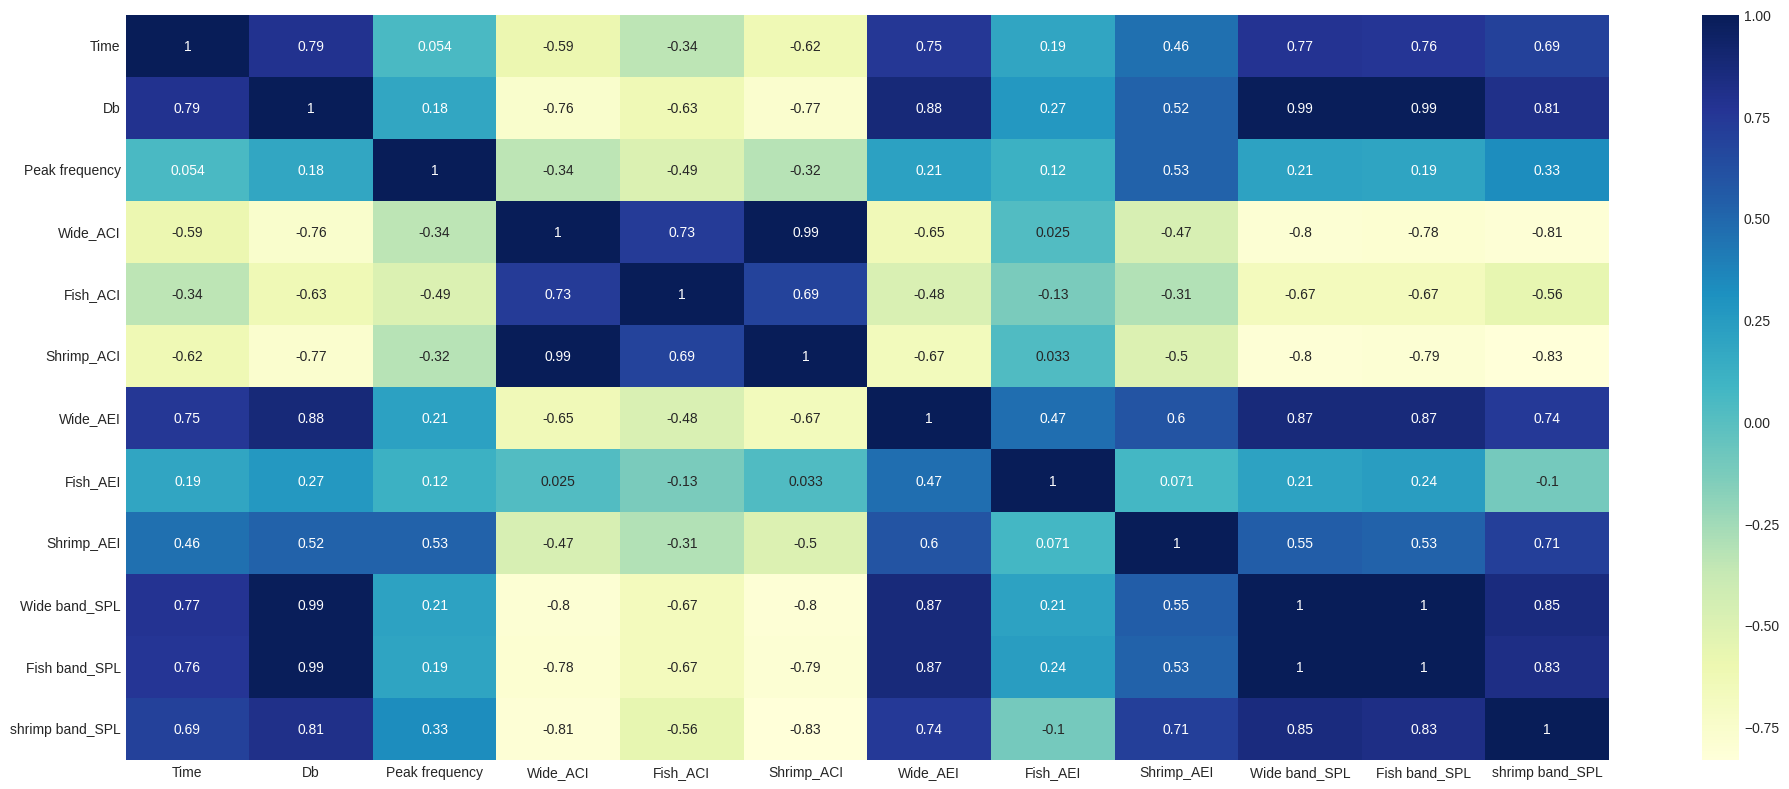

In [33]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(heat_spear,cmap="YlGnBu", annot=True)
plt.savefig('/content/drive/MyDrive/Sampan_Naik/heatmap1.eps')
plt.show()

In [34]:
# Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(spear)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.28317023 -0.26082369 -0.17867493 -0.23269203  0.30051714 -0.76643729
   0.29441937  0.00759399  0.00649826  0.03061981 -0.01559394 -0.00390421]
 [-0.34321742 -0.18692634 -0.06668408  0.04232205 -0.26977175 -0.02626096
  -0.20177853 -0.35417556  0.0103836  -0.7519852   0.0869124   0.16810044]
 [-0.13061938  0.47211806  0.63701892 -0.04227773  0.06036065 -0.39012577
  -0.43353678 -0.07090369  0.05220671  0.02016654 -0.00826155 -0.02095542]
 [ 0.31880538 -0.22813757  0.13881821 -0.23176651 -0.46411849 -0.19066814
  -0.01360955  0.13532392 -0.05813696 -0.15967011 -0.03508505 -0.68772572]
 [ 0.25919242 -0.24516809 -0.16321805 -0.56632929  0.34405285  0.12035464
  -0.5516338  -0.27411311 -0.06919199  0.08274405  0.00567179  0.03716413]
 [ 0.32201135 -0.21037351  0.16175459 -0.16001993 -0.49080853 -0.22074839
   0.01161973  0.12863863  0.01117945  0.15774917  0.0219473   0.68445855]
 [-0.31834442 -0.29651368  0.12651805 -0.13041053  0.06123652  0.18426116
  -0.2035279  

In [35]:
tot = 0
for i in eig_vals:
  tot = tot + i
print(tot)
# eig_vals
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("Variance",var_exp)

12.000000000000012
Cumulative Variance Explained [ 63.53752965  75.20242451  85.12028325  92.30337302  94.96718212
  97.33278717  98.59169138  99.39123426  99.89823693  99.96224512
  99.99070123 100.        ]
Variance [63.537529646589796, 11.664894863243045, 9.917858744465828, 7.183089769770596, 2.663809094709337, 2.3656050474172634, 1.2589042137607613, 0.7995428772572024, 0.5070026709515666, 0.06400818690675229, 0.028456114521193256, 0.009298770406657386]


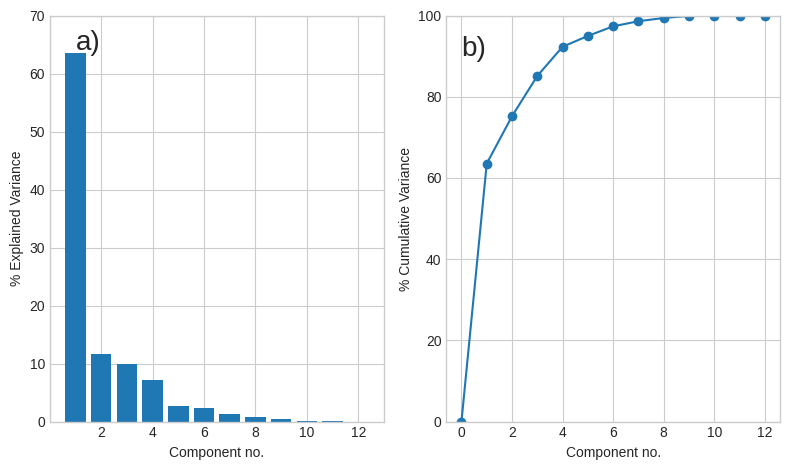

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

width=8
dpi=100
 # Create figure
fig, axs = plt.subplots(1, 2)
n = 12
grid = np.arange(1, n + 1)
    # Explained variance
evr = var_exp
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component no.", ylabel="% Explained Variance", ylim=(0.0, 70.0))
axs[0].text(1,64,'a)',fontsize=20)
    # Cumulative Variance
cv = cum_var_exp
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component no.", ylabel="% Cumulative Variance", ylim=(0.0, 100.0))
axs[1].text(0,90,'b)',fontsize=20)
    # Set up figure
fig.set(figwidth=8, dpi=100)
plt.savefig('/content/drive/MyDrive/Sampan_Naik/scree1.svg',format='svg',transparent=True)

In [37]:
# Taking 4 eigen vectors
sVT = eig_vecs[:,:4].T
sXT=X_.T.values
sZ=np.dot(sVT,sXT)

In [38]:
component_names = [f"PC{i+1}" for i in range(4)]
S_pca_df = pd.DataFrame(sZ.T.tolist(), columns=component_names)
S_pca_df.head()

,PC1,PC2,PC3,PC4
0,-290.063731,9.389912,448.950826,-383.939125
1,-283.918187,-56.815507,362.141168,-380.689705
2,-303.987023,-0.082108,442.181586,-390.205654
3,-308.231544,-4.127745,439.706816,-393.174904
4,-309.939532,-9.786306,438.184394,-398.474816


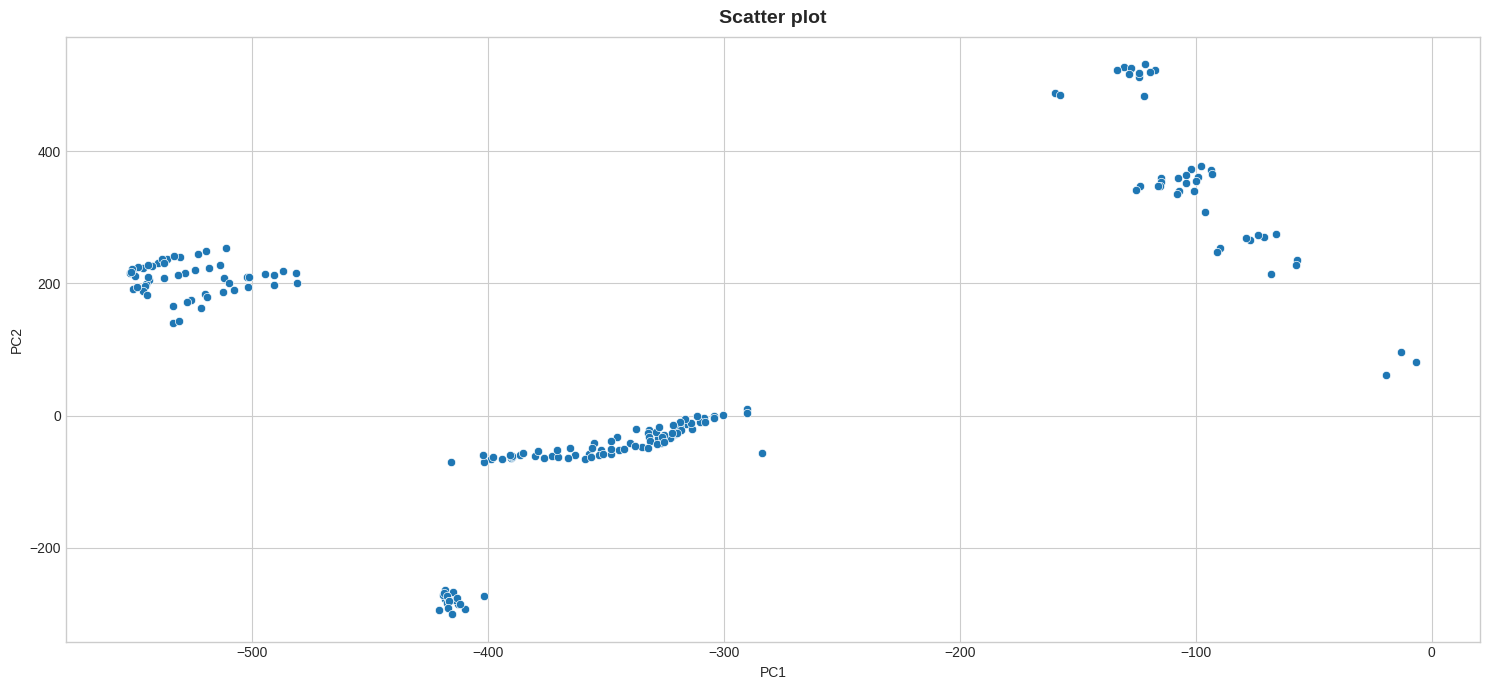

In [39]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(x=S_pca_df['PC1'],y=S_pca_df['PC2'])
plt.show()

In [40]:
# zscore
df_z = zscore(S_pca_df)

In [41]:
distortions = []
labels = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_z)
    distortions.append(kmeanModel.inertia_)
l = kmeanModel.labels_

In [42]:
df_z['labels'] = l

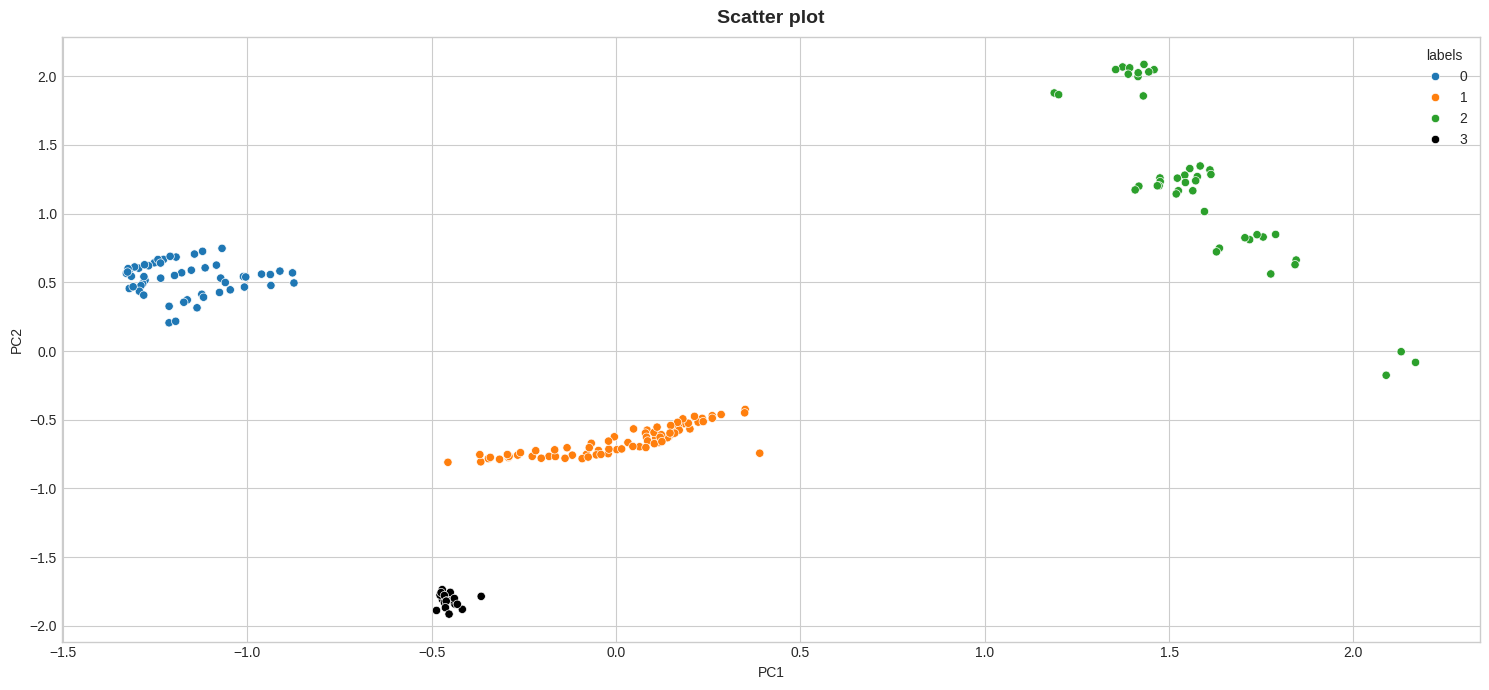

In [43]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Scatter plot')
sns.scatterplot(x=df_z['PC1'],y=df_z['PC2'],hue = df_z['labels'],palette=["C0", "C1", "C2", 'k'])
# plt.save
plt.show()

In [50]:
mark = []
for i in l:
  if i == 0:
    mark.append('o')
  elif i == 1:
    mark.append('*')
  elif i == 2:
    mark.append('x')
  # elif i == 3:
  # mark.append('s')
  # elif i == 4:
  # mark.append('^')
  # elif i == 5:
  # mark.append('+')
  else:
    mark.append('d')
print(len(mark))

191


In [51]:
from statsmodels.discrete.discrete_model import MultinomialResults
import matplotlib.lines as mlines
star = mlines.Line2D([], [],color="g", marker='*', linestyle='None',
                          markersize=10)
# square = mlines.Line2D([], [],color="black", marker='s', linestyle='None',
#                           markersize=10)
poly = mlines.Line2D([],[],color="y",marker="x",linestyle='None',
                          markersize=10)
# triangle = mlines.Line2D([], [],color="y", marker='^', linestyle='None',
#                           markersize=10)
circle = mlines.Line2D([], [],color="C0", marker='o', linestyle='None',
                          markersize=10)
diamond = mlines.Line2D([], [],color="m", marker='d', linestyle='None',
                          markersize=10)
# eight = mlines.Line2D([], [],color="r", marker='+', linestyle='None',
#                           markersize=10)

<ipython-input-52-abf596267c73>:48: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
<ipython-input-52-abf596267c73>:48: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
<ipython-input-52-abf596267c73>:48: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:


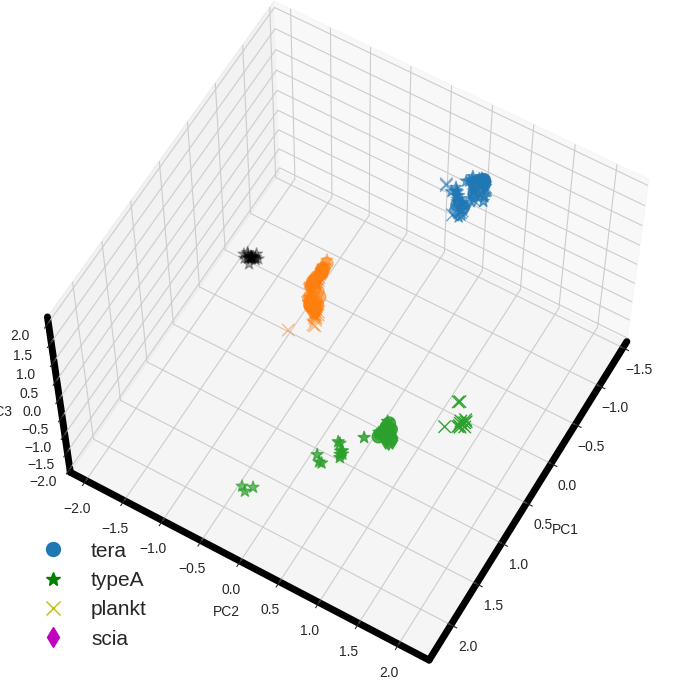

In [52]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.markers as mmarkers
m=mark
colors = ListedColormap(["C0", "C1", "C2", 'black'])
classes = ['tera','typeA','plankt','scia']
def mscatter(x,y,z,ax=None, m=None, **kw):
  if not ax: ax=plt.gca()
  sc = ax.scatter(x,y,z,**kw)
  if (m is not None) and (len(m)==len(x)):
    paths = []

    for marker in m:
      if isinstance(marker, mmarkers.MarkerStyle):
        marker_obj = marker
      else:
        marker_obj = mmarkers.MarkerStyle(marker)
        path = marker_obj.get_path().transformed(marker_obj.get_transform())
        paths.append(path)
    sc.set_paths(paths)
  return sc

fig = plt.figure(figsize=(15 , 7))
ax = fig.add_subplot(111, projection='3d')
# feature_names = X.columns
# xs = eig_vecs[0]
# ys = eig_vecs[1]
# zs = eig_vecs[2]
# # # Plot the loadings
# for i, varnames in enumerate(feature_names):
# # ax.scatter(xs[i], ys[i], zs[i], s=400,alpha=0.25)
# ax.text(
# xs[i] + 0.1,
# ys[i] + 0.1,
# zs[i] + 0.1,
# varnames)
# # Plot the arrows
# x_arr = np.zeros(len(eig_vecs[0]))
# y_arr = z_arr = x_arr
# ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs,alpha=0.5)

scatter = mscatter(x=df_z['PC1'],y=df_z['PC2'],z=df_z['PC3'],c=df_z['labels'],cmap=colors, m=m,s=80, ax=ax)
ax.legend(handles =[circle,star,poly,diamond],labels = classes,loc="lower left",fontsize=15)
# ax.set(xlim=(-2.4,-0.5),ylim=(0.8,2.5),zlim=(-2.5,-0.7))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
  axis.line.set_linewidth(5)
  axis.line.set_color('black')
ax.azim = 30
ax.elev = 60
# for angle in range(0, 360):
# ax.view_init(30, angle)
# plt.draw()
# plt.pause(.001)
plt.savefig('/content/drive/MyDrive/Sampan_Naik/3dScatter1.png')
plt.show()

In [57]:
column = ['Time','Peak','Peak']


In [58]:
X_

,Time,Db,Peak frequency,Wide_ACI,Fish_ACI,Shrimp_ACI,Wide_AEI,Fish_AEI,Shrimp_AEI,Wide band_SPL,Fish band_SPL,shrimp band_SPL
0,840,88.251681,861.328125,352.193885,26.869224,290.551995,0.107793,0.891084,0.147917,121.741351,120.049537,115.572434
1,855,94.311016,732.128906,349.741479,27.316954,288.400600,0.361470,0.897462,0.142868,125.267049,124.462998,116.182654
2,870,93.597116,861.328125,351.349077,27.216269,289.446729,0.271624,0.894944,0.145730,125.249877,124.397613,116.397882
3,885,94.147293,861.328125,351.027752,26.660596,290.034240,0.187662,0.894372,0.154119,125.212633,124.511974,115.631092
4,900,93.720958,861.328125,355.876209,26.729999,293.423045,0.248323,0.894582,0.146458,125.403830,124.630878,116.046655
...,...,...,...,...,...,...,...,...,...,...,...,...
331,105,79.636554,1205.859375,380.383940,27.473335,317.413196,0.098778,0.894598,0.156466,115.603063,109.491798,113.531846
332,120,77.746644,1205.859375,378.535907,27.555574,315.604459,0.069500,0.889930,0.154817,115.360949,108.719916,113.403066
333,135,75.875152,1119.726563,378.166215,27.668378,314.958048,0.045824,0.893940,0.161124,114.800323,107.714756,112.946609
334,150,77.396134,1205.722656,371.807514,28.693808,308.454243,0.144953,0.891417,0.155847,114.856917,107.713662,112.952001


In [59]:
columns = X_.columns.values

In [60]:
columns= ['Time(sec)','Peak(dB)','Peak frequency(Hz)','ACI','ACI','ACI','AEI','AEI','AEI','SPL','SPL','SPL']

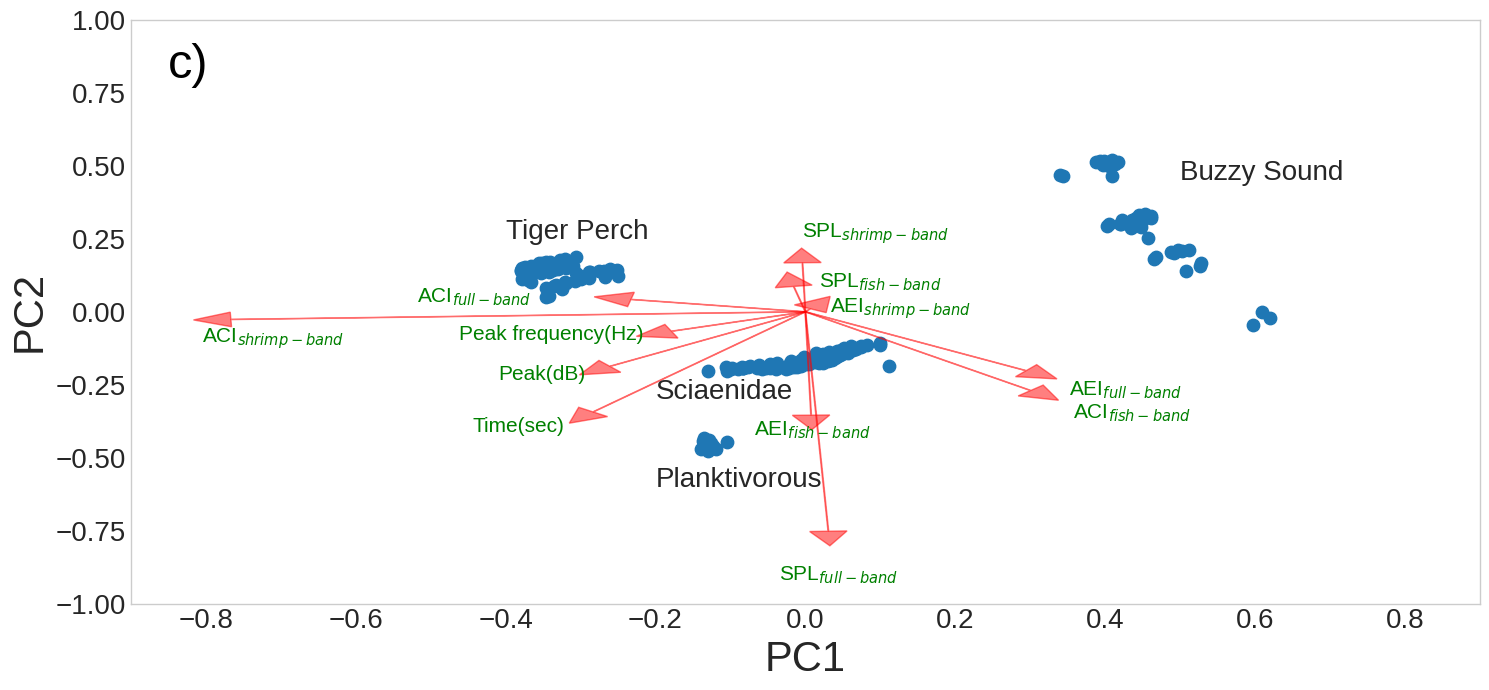

In [62]:
def myplot(score,coeff,labels=None):
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(15 , 7))
    plt.scatter(xs * scalex,ys * scaley,s=80)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],head_width=0.050, head_length=0.05,color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        elif i ==0 or i == 1 :
            plt.text(coeff[i,0]* 1.35, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i ==2:
            plt.text(coeff[i,0]* 1.9, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i == 3:
            plt.text(coeff[i,0]* 1.9, coeff[i,1] * 1.15, labels[i]+"$_{full-band}$", color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i ==6 or i ==9:
            plt.text(coeff[i,0]* 1.45, coeff[i,1] * 1.15, labels[i]+"$_{full-band}$", color = 'g', ha = 'center', va = 'top',fontsize=15)
        elif i == 4:
            plt.text(coeff[i,0]* 1.45, coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'center', va = 'top',fontsize=15)
        elif i==7:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'center', va = 'center',fontsize=15)
        elif i==10:
            plt.text(coeff[i,0]* (-1.15), coeff[i,1] * 1.15, labels[i]+"$_{fish-band}$", color = 'g', ha = 'left', va = 'center',fontsize=15)
        elif i==8:
            plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i]+"$_{shrimp-band}$", color = 'g', ha = 'left', va = 'top',fontsize=15)
        else:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.85, labels[i]+"$_{shrimp-band}$", color = 'g', ha = 'left', va = 'top',fontsize=15)



    plt.xlabel("PC{}".format(1),fontsize=30)
    plt.ylabel("PC{}".format(2),fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(-0.9,0.9)
    plt.ylim(-1.,1)
    plt.text(-0.85,0.8,r"c)",fontsize=35,color='k')
    plt.text(-0.2,-0.30,'Sciaenidae',fontsize=20)
    plt.text(0.50,0.45,'Buzzy Sound',fontsize=20)
    plt.text(-0.2,-0.60,'Planktivorous',fontsize=20)
    plt.text(-0.4,0.25,'Tiger Perch',fontsize=20)
    # for axis in ['top','bottom','left','right']:
    #     ax.spines[axis].set_linewidth(4)
    plt.grid()
    plt.savefig('/content/drive/MyDrive/Sampan_Naik/factor2d.svg',format='svg',transparent=True)

myplot(df_z.iloc[:,:2],np.transpose(eig_vecs[:2,:]),columns)
plt.show()

### Confusion Matrix


In [75]:
df_z['labels'].value_counts()

,count
labels,
1,76
0,53
2,44
3,18


In [98]:
y.label.value_counts()

,count
label,
scia,79
tera,65
typeA,26
plankt,21


In [99]:
# convert labels into integers
nums = {"label":{'scia':1,'tera':0,'typeA':2,'plankt':3}}
y = y.replace(nums)

<ipython-input-99-1c24e8deeb9f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(nums)


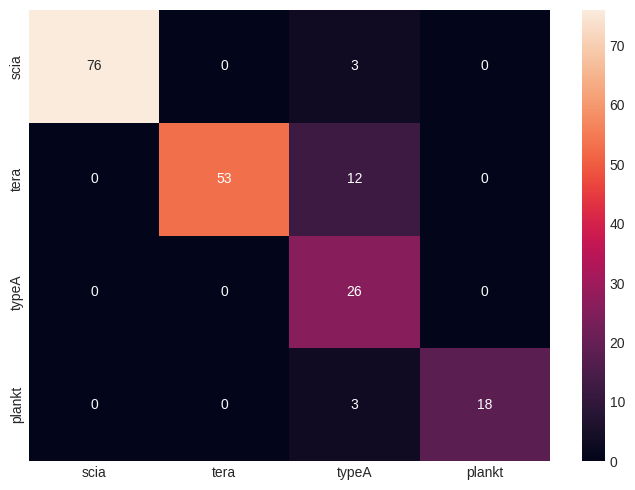

In [100]:
from sklearn import metrics
cm = metrics.confusion_matrix(y,df_z['labels'],labels=[1,0,2,3])
df_cm = pd.DataFrame(cm,index=[i for i in ['scia','tera','typeA','plankt']],
columns = [i for i in ['scia','tera','typeA','plankt']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
# plt.savefig('/content/drive/MyDrive/NIO/confusion.png')
plt.show()

In [ ]:
# Go to the directory where your file is
%cd /content/drive/MyDrive/Colab\ Notebooks/

In [ ]:
!jupyter nbconvert --to pdf Pca11Column191Data.ipynb